# Taking the Lid Off The Black Box.

## AI Workshop Exercise

Image classification of 3 types of Fossil with a Deep  Convolutional Neural Network

1. Designed our own model
2. Tuned the architecture of a model 
3. Used a pre-trained model and transfer learning

![](https://raw.githubusercontent.com/GNS-Science/AI_workshop_GNS_staff_conference/main/notebook_images/mf_composite.png)

## Today's Exercise
Today we're going to go back over the problem used in our conference session in a bit more detail.  we'll Dive deeper into why transfer learning is so effective.

1. Enjoy some hand wavy metaphors
2. Learn how Feature Visualisation works
3. Use Feature Visualisation to verify our tenuous intuitions

# Hand Wavy Metaphors

In [2]:
#@title No Free Lunch
#@markdown On the left we see a typical example of a loss function in 1 dimension.  
#@markdown The loss function is extremely simple so any number of alogrithms would find good solutions but let's consider an algorithm that uses the gradient of the loss to improve solutions.
#@markdown This algorithm on this problem can always turn a non optimal solution into a better solution by taking a small step downhill.
#@markdown Wow, that's good, that must be a great algorythm!  But...  For every problem that an algorithm works well on, there exists another problem for which the very thing that made the algorythm good, prevents it from working at all.
#@markdown On the right is one such example.  Here the worst points are found by following the loss downhill and the best are found by following it up hill.

#@markdown The No Free Lunch theorem says `All optimization algorithms perform equally well when their performance is averaged across all possible problems.`

#@markdown But all is not doom and gloom.  And this should be pretty obvious to anyone who has ever used an algorithm succesfully on a wide range of problems.
#@markdown If we also consider the observation that `Some algorithms work well on lots of problems that we are interested in solving`.
#@markdown Then we can infer that the reason is `The problems that we are interested in solving are similar in the space of all problems`.
#@markdown An example here is that unlike the problem on the right, for most real problems, a solution that's very close to the best solution is generally also a good solution.

%%html
<svg xmlns:osb="http://www.openswatchbook.org/uri/2009/osb" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:svg="http://www.w3.org/2000/svg" xmlns="http://www.w3.org/2000/svg" xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd" xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape" width="270mm" height="90mm" viewBox="0 0 90 30" version="1.1" id="svg8" inkscape:export-filename="/home/cking/lunch.png" inkscape:export-xdpi="300" inkscape:export-ydpi="300" inkscape:version="0.92.5 (2060ec1f9f, 2020-04-08)" sodipodi:docname="no_free_lunch.svg"> <defs id="defs2"> <inkscape:path-effect effect="powerstroke" id="path-effect11542" is_visible="true" offset_points="0,-23.4663" sort_points="true" interpolator_type="CubicBezierJohan" interpolator_beta="0.2" start_linecap_type="zerowidth" linejoin_type="extrp_arc" miter_limit="4" end_linecap_type="zerowidth" /> <linearGradient id="linearGradient1840" osb:paint="solid"> <stop style="stop-color:#000000;stop-opacity:1;" offset="0" id="stop1838" /> </linearGradient> <marker inkscape:stockid="Tail" orient="auto" refY="0" refX="0" id="Tail" style="overflow:visible" inkscape:isstock="true"> <g id="g1434" transform="scale(-1.2)" style="fill:#000000;fill-opacity:1;stroke:#000000;stroke-opacity:1"> <path id="path1422" d="M -3.8048674,-3.9585227 0.54352094,0" style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0.80000001;stroke-linecap:round;stroke-opacity:1" inkscape:connector-curvature="0" /> <path id="path1424" d="M -1.2866832,-3.9585227 3.0617053,0" style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0.80000001;stroke-linecap:round;stroke-opacity:1" inkscape:connector-curvature="0" /> <path id="path1426" d="M 1.3053582,-3.9585227 5.6537466,0" style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0.80000001;stroke-linecap:round;stroke-opacity:1" inkscape:connector-curvature="0" /> <path id="path1428" d="M -3.8048674,4.1775838 0.54352094,0.21974226" style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0.80000001;stroke-linecap:round;stroke-opacity:1" inkscape:connector-curvature="0" /> <path id="path1430" d="M -1.2866832,4.1775838 3.0617053,0.21974226" style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0.80000001;stroke-linecap:round;stroke-opacity:1" inkscape:connector-curvature="0" /> <path id="path1432" d="M 1.3053582,4.1775838 5.6537466,0.21974226" style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0.80000001;stroke-linecap:round;stroke-opacity:1" inkscape:connector-curvature="0" /> </g> </marker> <marker inkscape:stockid="Arrow1Lstart" orient="auto" refY="0" refX="0" id="Arrow1Lstart" style="overflow:visible" inkscape:isstock="true"> <path id="path1386" d="M 0,0 5,-5 -12.5,0 5,5 Z" style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1.00000003pt;stroke-opacity:1" transform="matrix(0.8,0,0,0.8,10,0)" inkscape:connector-curvature="0" /> </marker> <inkscape:path-effect effect="powerstroke" id="path-effect1384" is_visible="true" offset_points="0.76502732,-23.466321" sort_points="true" interpolator_type="CubicBezierJohan" interpolator_beta="0.2" start_linecap_type="zerowidth" linejoin_type="extrp_arc" miter_limit="4" end_linecap_type="zerowidth" /> </defs> <sodipodi:namedview id="base" pagecolor="#ffffff" bordercolor="#666666" borderopacity="1.0" inkscape:pageopacity="0.0" inkscape:pageshadow="2" inkscape:zoom="2" inkscape:cx="73.283906" inkscape:cy="148.99857" inkscape:document-units="mm" inkscape:current-layer="layer2" showgrid="false" inkscape:window-width="1920" inkscape:window-height="1043" inkscape:window-x="1920" inkscape:window-y="0" inkscape:window-maximized="1" /> <metadata id="metadata5"> <rdf:RDF> <cc:Work rdf:about=""> <dc:format>image/svg+xml</dc:format> <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage" /> <dc:title></dc:title> </cc:Work> </rdf:RDF> </metadata> <g inkscape:label="Layer 1" inkscape:groupmode="layer" id="layer1" transform="translate(0,-267)" style="display:inline"> <path style="fill:none;fill-rule:nonzero;stroke:#000000;stroke-width:0.30000001;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1" d="m 4.0745335,279.10152 c 4.5772028,-1.0624 9.4052105,-2.24978 11.9759675,0 2.570758,2.24977 2.19455,13.24867 4.138294,9.9365 1.943743,-3.31216 -0.125404,-10.12398 4.012889,-9.24907 4.138293,0.87491 2.570758,3.49965 7.022558,4.74953 4.451799,1.24987 2.194549,-3.62464 10.72194,-5.24948" id="path11540" inkscape:connector-curvature="0" /> </g> <g inkscape:groupmode="layer" id="layer2" inkscape:label="Layer 2" style="display:inline" transform="translate(0,-25)"> <path id="rect11560" style="fill:none;fill-opacity:1;stroke:#000000;stroke-width:0.30000001;stroke-linecap:round;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1;paint-order:normal" d="m 62.26435,47.442543 v 0 -17.62715 h 0.753722 l 0.01776,17.502354 M 47.104927,37.101516 c 2.434976,-0.565171 4.929808,-1.163017 7.12915,-1.262647 m 0.658365,-0.01546 c 1.662059,0.0053 3.123153,0.345826 4.188453,1.278113 2.026353,1.773342 2.23966,8.989253 3.183455,10.341028 m 0.771486,-0.124797 10e-7,10e-7 c 0,0 0.119818,-0.171463 0.183352,-0.279726 1.777869,-3.029513 0.198526,-8.986858 3.082696,-9.312079 m 0.711995,0.02305 c 0.07075,0.01085 0.143462,0.02414 0.218199,0.03995 4.138292,0.874914 2.570756,3.499655 7.022557,4.749528 0.3588,0.100735 0.631979,0.155989 0.954816,0.187765 m 0.584348,0.0012 c 2.425067,-0.249746 1.879395,-3.850936 8.616472,-5.32583" inkscape:connector-curvature="0" sodipodi:nodetypes="ccccccccscccscccsccc" /> <path style="fill:none;fill-opacity:1;stroke:#000000;stroke-width:0.30000001;stroke-linecap:round;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1;paint-order:normal" d="M 54.892442,35.823402 V 50.868886 H 54.234077 V 35.838869" id="rect11666" inkscape:connector-curvature="0" sodipodi:nodetypes="cccc" /> <path style="fill:none;fill-opacity:1;stroke:#000000;stroke-width:0.30000001;stroke-linecap:round;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1;paint-order:normal" d="m 75.212026,42.721421 0.0019,-11.231841 h 0.570583 v 11.239574" id="rect11668" inkscape:connector-curvature="0" sodipodi:nodetypes="cccc" /> <path style="fill:none;fill-opacity:1;stroke:#000000;stroke-width:0.30000001;stroke-linecap:round;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1;paint-order:normal" d="M 67.006354,37.752837 V 49.993974 H 66.304098 V 37.725771" id="rect11670" inkscape:connector-curvature="0" sodipodi:nodetypes="cccc" /> <path style="fill:none;fill-opacity:1;stroke:#000000;stroke-width:0.30000001;stroke-linecap:round;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1;paint-order:normal" d="m 84.973813,47.762948 h -0.542741 l -0.0208,-10.361324" id="rect11674" inkscape:connector-curvature="0" sodipodi:nodetypes="ccc" /> <rect style="fill:#afe9af;fill-opacity:1;stroke:none;stroke-width:0.30000001;stroke-linecap:round;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1;paint-order:normal" id="rect11680" width="3.4395833" height="25.267708" x="42.730209" y="27.21875" ry="0.30969214" /> </g></svg>

# Instrumental Convergenge
Instrumental Convergence is an emergent property of optimizers.  My favourite example is why Artificial General Inteligence always wants to take over the world.  Set an AGI with any maximisation task and it will eventually take over the world in order to do that.  Collecting stamps?  It's much easier to convert the entire worlds forests into stamp paper when you've already taken over the world.  People annoyingly trying to turn you off? better secure your world domination.

[Why Would AI Want to do Bad Things? Instrumental Convergence](https://www.youtube.com/watch?v=ZeecOKBus3Q&ab_channel=RobertMiles)

Just as accumulating power makes it easier to optimize the world no matter what your objective is.  Understanding visual features makes it easier to do a huge number of image processing tasks.  We should then expect that a model that performs well on any difficuilt image processing problem would develop a representation of images that is useful for many  


# Setting up the Problem

In [4]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
!pip install -q -U keras-tuner gdown
!pip install tensorflow-addons

!wget -q https://raw.githubusercontent.com/GNS-Science/AI_workshop_GNS_staff_conference/main/ImageClassesM.zip
!wget -q https://raw.githubusercontent.com/GNS-Science/AI_workshop_GNS_staff_conference/main/nn_utils.py
!unzip ImageClassesM.zip > /dev/null

import numpy as np
import matplotlib.pyplot as plt
import nn_utils
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax
from tensorflow.keras.applications import ResNet50

input_dir = "/content/ImageClassesM"
ImageArray, Labels = nn_utils.read_images(images_dir=input_dir)

2.12.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
replace ImageClassesM/ActinommaPopofskii/aug_6_3378441.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


class1.shape=(750, 148, 148, 3)
class2.shape=(800, 148, 148, 3)
class3.shape=(500, 148, 148, 3)


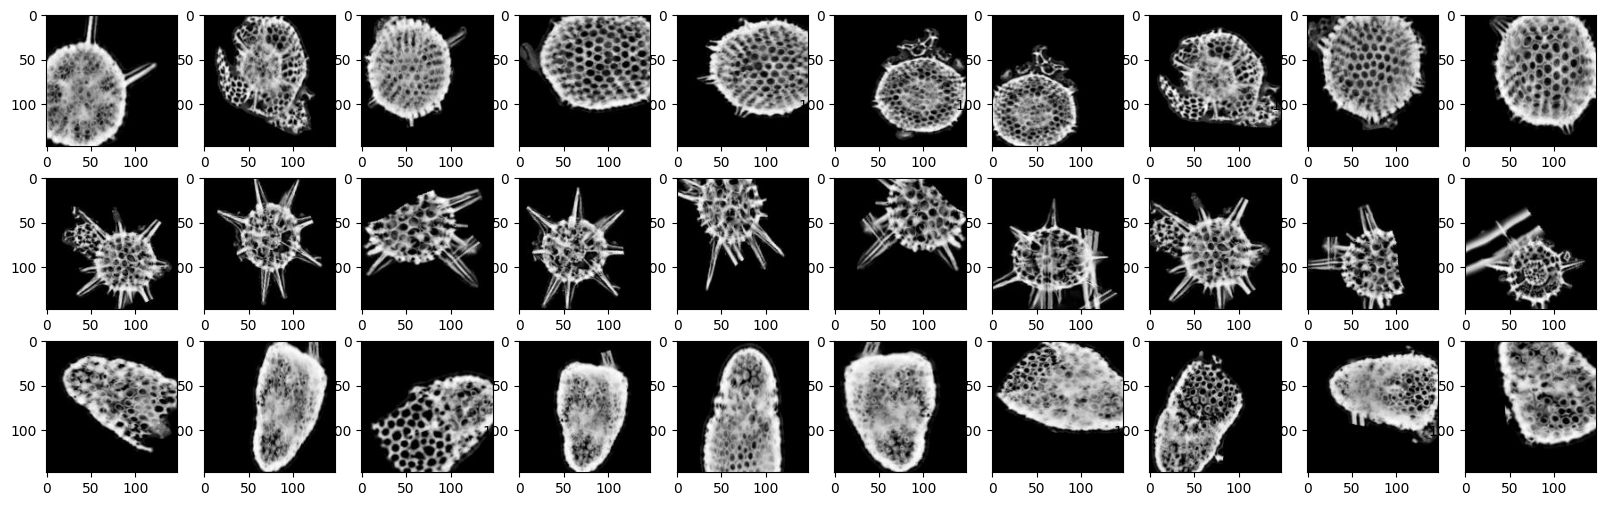

In [5]:
#@title Examples from the dataset.
#@markdown * **top row**: class1
#@markdown * **midde row**: class2
#@markdown * **bottom row**: class3
def sort_images(images, labels):
    class1, class2, class3 = [], [], []
    for image, label in zip(images, labels):
        if np.all(label == np.array([1, 0, 0])):
            class1.append(image)
        elif np.all(label == np.array([0, 1, 0])):
            class2.append(image)
        elif np.all(label == np.array([0, 0, 1])):
            class3.append(image)
        else:
            raise ValueError('Unknown label')
    return np.array(class1), np.array(class2), np.array(class3)

class1, class2, class3 = sort_images(ImageArray, Labels)
print(f"{class1.shape=}")
print(f"{class2.shape=}")
print(f"{class3.shape=}")

plots_per_class = 10 #@param {type:"slider", min:1, max:100, step:1}
fig, axs = plt.subplots(3, plots_per_class, figsize=(20, 6))
for image1, image2, image3, ax in zip(class1, class2, class3, axs.T):
    ax[0].imshow(image1/255)
    ax[1].imshow(image2/255)
    ax[2].imshow(image3/255)


In [6]:
# Split Data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    ImageArray, Labels, test_size=0.2, random_state=42, stratify=Labels
)

# -- 3.1 init of the Model with new top layer
image_shape = ImageArray.shape[1:] # dimension of one image -> input
number_of_class = y_train.shape[1] # number of class, size of the prediction distribution -> output

94765736/94765736 [==============================] - 1s 0us/step


Epoch 1/15
41/41 [==============================] - 17s 109ms/step - loss: 10.1937 - categorical_accuracy: 0.9215 - val_loss: 0.1275 - val_categorical_accuracy: 0.9939
Epoch 2/15
41/41 [==============================] - 3s 67ms/step - loss: 0.0454 - categorical_accuracy: 0.9939 - val_loss: 0.0481 - val_categorical_accuracy: 0.9970
Epoch 3/15
41/41 [==============================] - 3s 62ms/step - loss: 0.0179 - categorical_accuracy: 0.9962 - val_loss: 0.0209 - val_categorical_accuracy: 0.9970
Epoch 4/15
41/41 [==============================] - 3s 64ms/step - loss: 3.7212e-04 - categorical_accuracy: 1.0000 - val_loss: 2.5660e-04 - val_categorical_accuracy: 1.0000
Epoch 5/15
41/41 [==============================] - 3s 65ms/step - loss: 9.3022e-06 - categorical_accuracy: 1.0000 - val_loss: 3.4640e-04 - val_categorical_accuracy: 1.0000
Epoch 6/15
41/41 [==============================] - 3s 73ms/step - loss: 6.3686e-06 - categorical_accuracy: 1.0000 - val_loss: 4.2370e-04 - val_categorical_

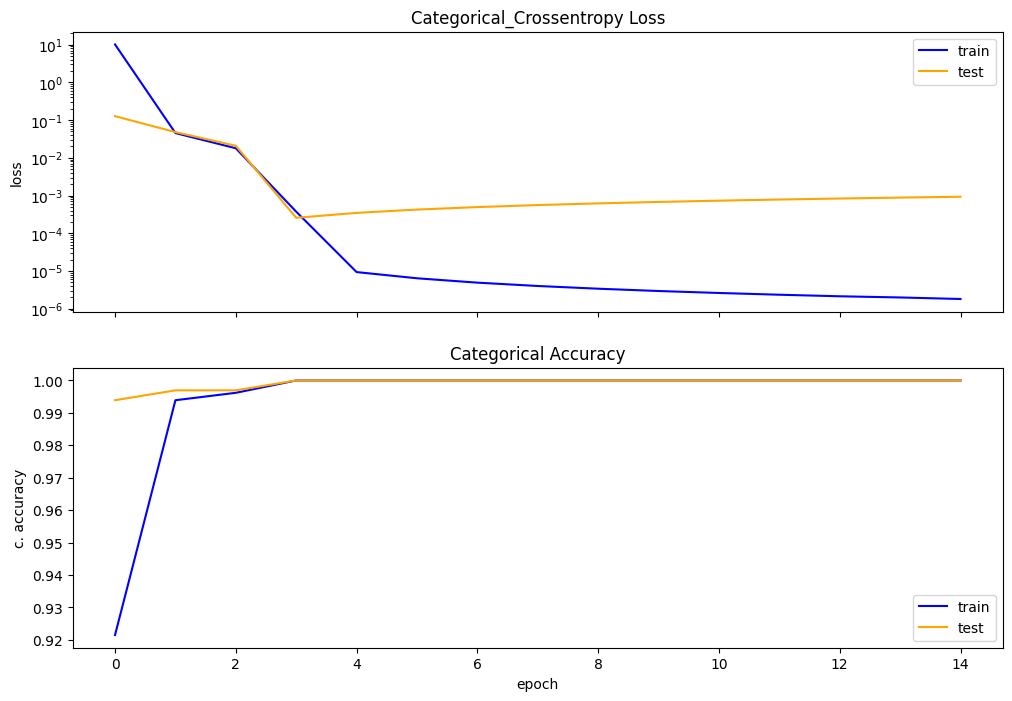

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                                 
 softmax (Softmax)           (None, 3)                 0         
                                                                 
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________


In [7]:
#@title Get and Further Train Pretrained Model
def get_pretrained_model(input_shape, n_class, learning_rate=0.001):
    pretrained_model = Sequential()
    resnet = ResNet50(
        input_shape=input_shape, 
        include_top=False, 
        weights='imagenet', 
        pooling='max'
    )
    for layer in resnet.layers:
        layer.trainable = False
    pretrained_model.add(resnet)
    pretrained_model.add(Dense(n_class, activation=None))
    pretrained_model.add(Softmax())
    opt = keras.optimizers.SGD(lr=learning_rate)
    pretrained_model.compile(optimizer=opt, loss='categorical_crossentropy',
                metrics=[keras.metrics.categorical_accuracy])

    return pretrained_model

pretrained_model = get_pretrained_model(input_shape=image_shape, n_class=number_of_class)

resnet = pretrained_model.get_layer('resnet50')
dense = pretrained_model.get_layer('dense')
pretrained_no_softmax = lambda x: dense(resnet(x))

# -- 3.2 training and evaluating the model with a subset of unseen data (validation)
history = pretrained_model.fit(x=X_train, y=y_train, batch_size=32, validation_split=0.2, epochs=15)

# -- 3.3 testing the model
eval_result = pretrained_model.evaluate(x=X_test, y=y_test)
print(f"""
            Evaluation of test data [test loss, test accuracy] is {eval_result}.
        """)

# -- 3.4 plot summary 
nn_utils.summarize_diagnostics(history=history, filename="/content/pretrained_summary.jpg")
pretrained_model.summary()

In [17]:
#@title Get and Train Model from scratch
def get_scratch_model(input_shape, n_classes, learning_rate=1e-3):
    model = tf.keras.models.Sequential()
    model.add(
        tf.keras.applications.MobileNet(input_shape=input_shape, include_top=False, weights=None)
    )
    model.add(tf.keras.layers.Lambda(lambda x: tf.reduce_sum(x, axis=(1, 2))))
    model.add(tf.keras.layers.Dense(n_classes))
    model.add(tf.keras.layers.Softmax())
    opt = keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy',
                metrics=[keras.metrics.categorical_accuracy])
    return model


scratch_model = get_scratch_model(image_shape, number_of_class)

history = scratch_model.fit(x=X_train, y=y_train, batch_size=32, validation_split=0.2, epochs=50)

# -- 3.3 testing the model
eval_result = scratch_model.evaluate(x=X_test, y=y_test)
print(f"""
            Evaluation of test data [test loss, test accuracy] is {eval_result}.
        """)

# -- 3.4 plot summary 
nn_utils.summarize_diagnostics(history=history, filename="/content/scratch_summary.jpg")
scratch_model.summary()

def scratch_no_softmax():
    """Utility fucntion to execute the model without running the softmax at the
    end.  This makes it easier to do the feature visualisation"""
    mobile_net = scratch_model.get_layer('mobilenet_1.00_148')
    _lambda = scratch_model.get_layer('lambda')
    dense1 = scratch_model.get_layer('dense_1')
    return lambda x: dense1(_lambda(mobile_net(x)))

## Gradient Descent Refresher
<!-- We have a function $f: \mathbb{\Theta}, \mathbb{X} \to \mathbb{Y}$ -->
We have our neural network function $y = f(\theta, x)$ where $\theta$ are the network parameters, $x$ is the input data, and $y$ is the function output.  Then we have a loss function $l(y)$ which tells us how bad the network's outputs are.  Then we optimise the parameters $\theta$ to minimize the loss.

That is find the value of $\theta$ for which $l(f(\theta, x))$ is the lowest. 

Gradient descent works by starting with a random $\theta_0$ and at each step, performing the procedure $$\theta_{n+1} = \theta_n - \alpha * \nabla_{\theta_n} l(f(\theta_n, x))$$

This is all there is to training nueral networks with gradient descent and all that is needed to find the model parameters that best fit the data.

## Feature Visualisation and the Old Switcheroo
Once we've got a trained neural network with final parameters $\theta_f$ we can use the exact same procedure to find the inputs that best fit the model parameters.  The procedure is $$x_{n+1} = x_n - \alpha * \nabla_{x_n} l(f(\theta_f, x_n))$$
And by adjusting our loss function $l$, we can find inputs to the network which optimise certain outputs or intermediate values of the network.

## What Has Feature Visualisation Ever Done for Us?
The point here is that we get to see what different parts of the nueral network are looking for.  And by visually inspecting the optimised inputs we can see if the network is looking for robust features or spurious features.


In [9]:
"""
Taking gradients through convolutional nueral networks intoduces a lot of high 
frequency noise because the kernels doesn't smoothly fade to zero at their 
edges.  To combat this, we make small perturbations to the inputs to cancel out 
these random artefacts.  For a more complete discussion of artefact mitigation,
see https://distill.pub/2017/feature-visualization/#enemy-of-feature-vis
"""

def jitter(d, seed=None):
    """Applies a random shift of at most d pixels to the image every time"""
    def inner(image):
        shape = tf.shape(image)
        image = tf.pad(image, ((0, 0), (d, d), (d, d), (0, 0)))
        crop = tf.image.random_crop(image, shape, seed=seed)
        return crop
    return inner

def rotate(seed=None):
    """Applies a random rotation to the image every time"""
    def inner(image):
        angle = tf.random.uniform(shape=(1, ), minval=0, maxval=2 * np.pi, seed=seed)
        return tfa.image.rotate(image, angle)
    return inner

def three_to_1_to_3(image):
    """A little helper that converts a color image (3 channels) to a grey scale 
    image (1 channel) and then back into a color image (3 channels) but having 
    lost all color information.  This forces the feature visualistion to produce 
    greyscale images."""
    return tf.reduce_mean(image, axis=-1)[:, :, :, None] * tf.ones((1, 1, 1, 3))

def default_transform(image):
    """Convieniece function to represent all perturbation and constraints
    prior to input optimisation"""
    return jitter(32)(rotate()(three_to_1_to_3(image)))

  0%|          | 0/200 [00:03<?, ?it/s, loss=tf.Tensor(-25.342243, shape=(), dtype=float32)]

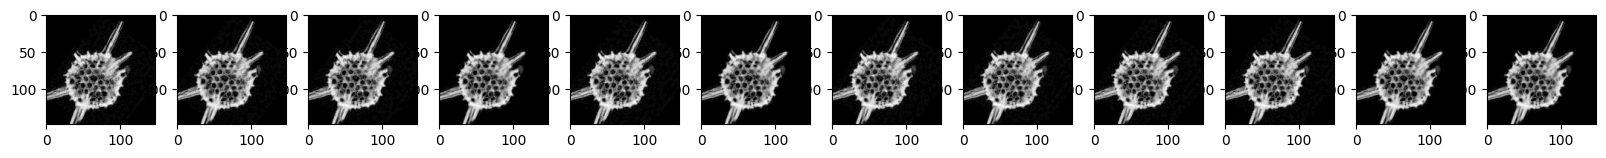

100%|█████████▉| 199/200 [00:44<00:00,  5.29it/s, loss=tf.Tensor(-482.61545, shape=(), dtype=float32)]

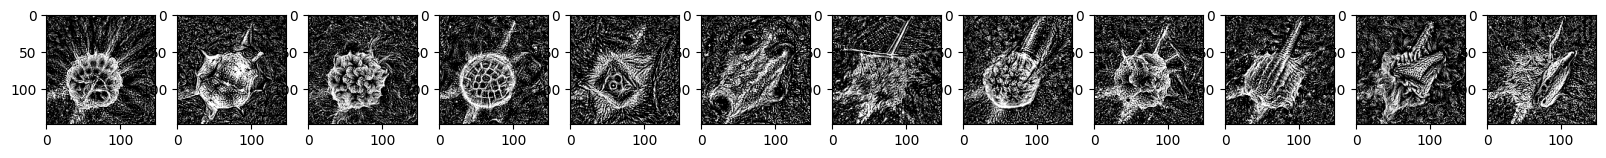

100%|██████████| 200/200 [00:45<00:00,  4.43it/s, loss=tf.Tensor(-482.61545, shape=(), dtype=float32)]


In [12]:
def plot_inputs(replicated_input):
    num_replicas = replicated_input.shape[0]
    fig, axs = plt.subplots(1, num_replicas, figsize=(20, 3))
    for i, ax in enumerate(axs):
        _result = tf.clip_by_value(replicated_input[i], 0, 255)
        _result = _result
        axs[i].imshow(_result/255)
    plt.show()

def get_logit_loss(logit_indices):
    def logit_loss(logits):
        """For each example in the batch, returns a loss inverse to the value of
        the logit at the logit_index corresponding to the example in the batch.
        
        This is equivalent to the neuron objective described in the article
        https://distill.pub/2017/feature-visualization/#optimization-objectives"""
        return -sum(logits[i, idx] for i, idx in enumerate(logit_indices))
    return logit_loss


def optimize_input_for_logits(model, loss_fn, input, num_replicas, learning_rate=1e+1, steps=300, plot_interval=50):
    """Takes the input and replicates it by `replicas`.  Then opimizes each 
    replica such that loss_fn(model(replicated_input)) is minimized"""
    replicated_input = tf.Variable(tf.ones((num_replicas, 1, 1, 3)) * input, trainable=True)
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    optimizer.build([replicated_input])
    loop =  tqdm(range(steps))
    for step in loop:
        with tf.GradientTape() as tape:
            logits = model(replicated_input)  # Logits for this minibatch
            loss = loss_fn(logits)
        grads = tape.gradient(loss, replicated_input)
        optimizer.apply_gradients(zip([grads], [replicated_input]))
        loop.set_postfix({'loss': loss})
        if step % plot_interval == 0 or step == steps-1:
            plot_inputs(replicated_input)

loss_fn_12 = get_logit_loss(range(12))

optimize_input_for_logits(lambda x: resnet(default_transform(x)), loss_fn_12, X_test[1:2], 12, learning_rate=1e+1, steps=200, plot_interval=200)

  0%|          | 0/500 [00:01<?, ?it/s, loss=tf.Tensor(6.3848114, shape=(), dtype=float32)]

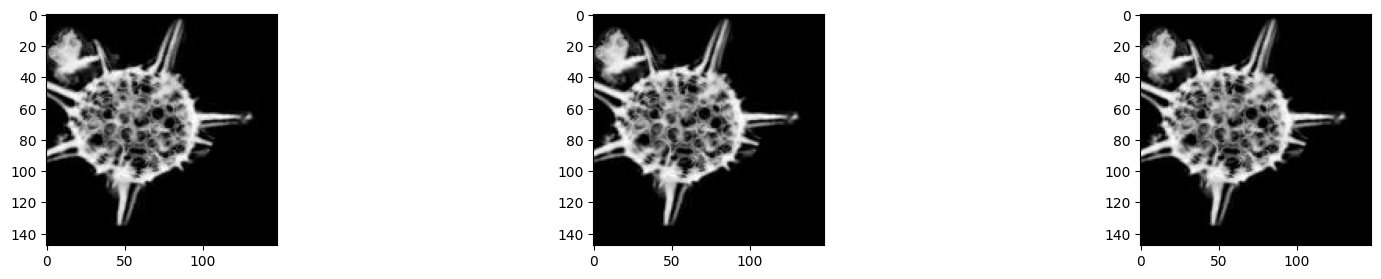

 20%|██        | 100/500 [00:27<01:10,  5.67it/s, loss=tf.Tensor(-356.74326, shape=(), dtype=float32)]

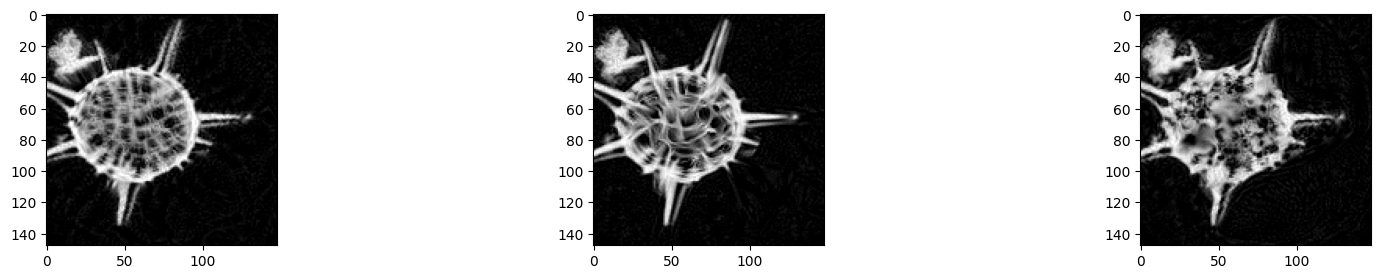

 40%|████      | 200/500 [00:46<01:08,  4.39it/s, loss=tf.Tensor(-421.06586, shape=(), dtype=float32)]

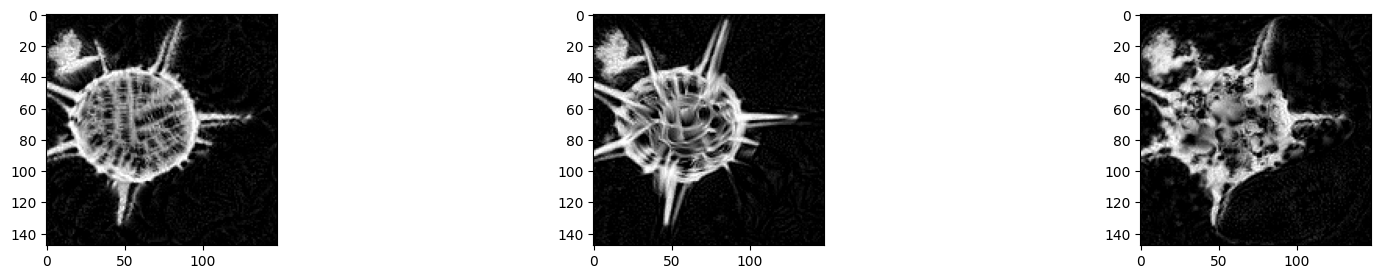

 60%|██████    | 300/500 [01:04<00:34,  5.75it/s, loss=tf.Tensor(-423.53357, shape=(), dtype=float32)]

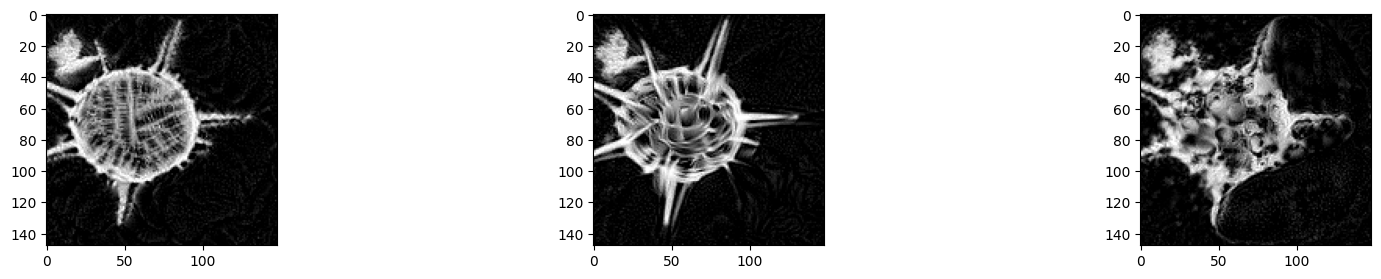

 80%|████████  | 400/500 [01:25<00:18,  5.51it/s, loss=tf.Tensor(-483.97046, shape=(), dtype=float32)]

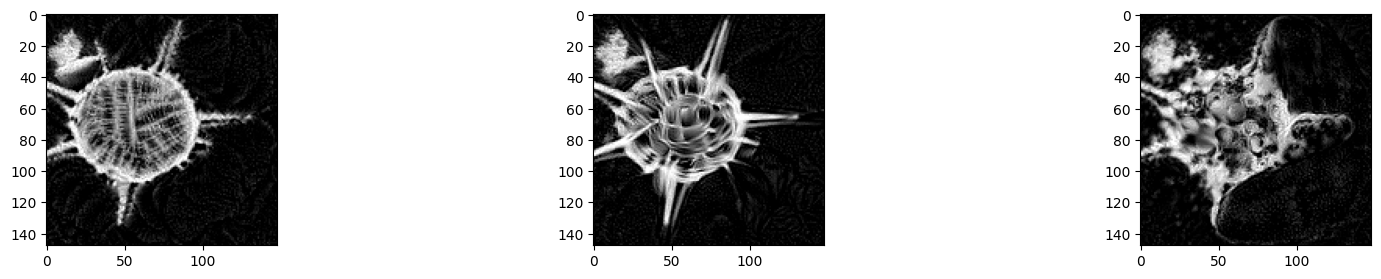

100%|█████████▉| 499/500 [01:46<00:00,  2.43it/s, loss=tf.Tensor(-455.2373, shape=(), dtype=float32)]

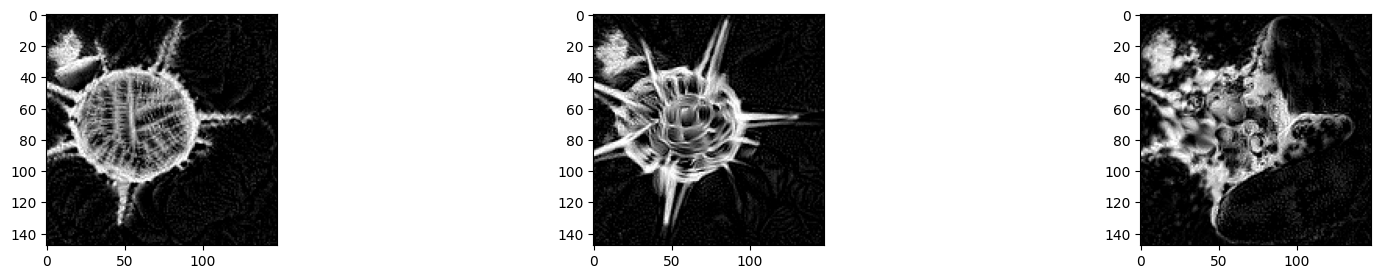

100%|██████████| 500/500 [01:48<00:00,  4.61it/s, loss=tf.Tensor(-455.2373, shape=(), dtype=float32)]


In [13]:
dataset_example = X_test[3:4]
optimize_input_for_logits(
    lambda x: pretrained_no_softmax(default_transform(x)), 
    loss_fn=get_logit_loss(range(number_of_class)), 
    input=dataset_example, 
    num_replicas=number_of_class, 
    learning_rate=1e0, 
    steps=500, 
    plot_interval=100
)

  0%|          | 0/500 [00:00<?, ?it/s, loss=tf.Tensor(-4.6976037, shape=(), dtype=float32)]

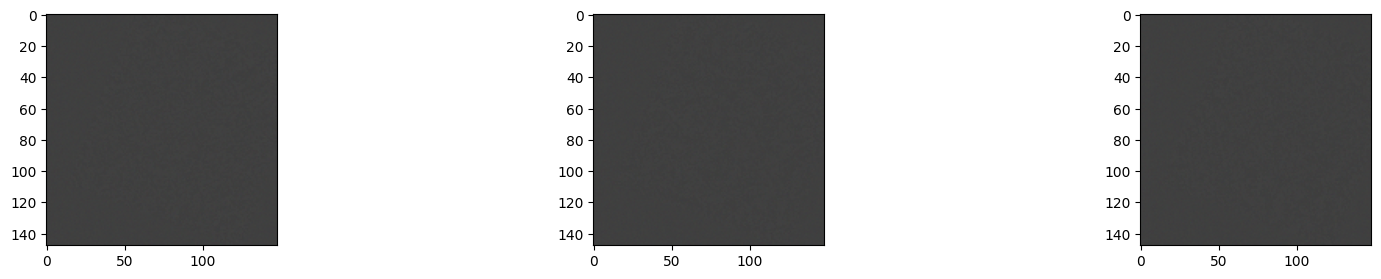

 20%|██        | 100/500 [00:22<01:36,  4.15it/s, loss=tf.Tensor(-227.44681, shape=(), dtype=float32)]

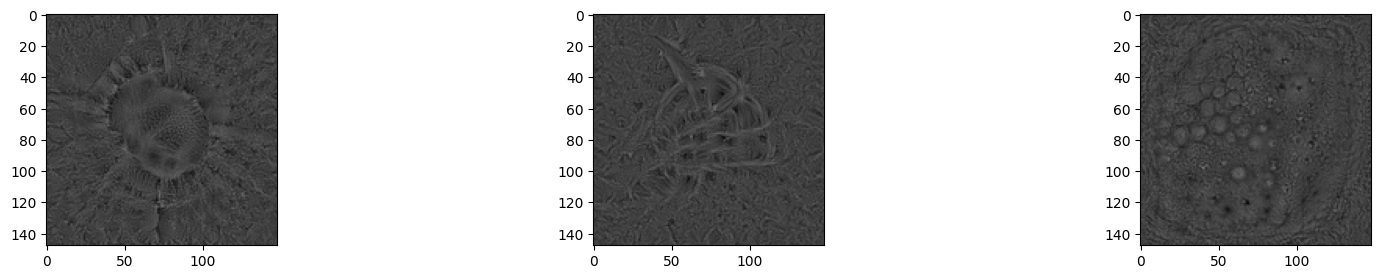

 40%|████      | 200/500 [00:53<01:40,  2.97it/s, loss=tf.Tensor(-342.47772, shape=(), dtype=float32)]

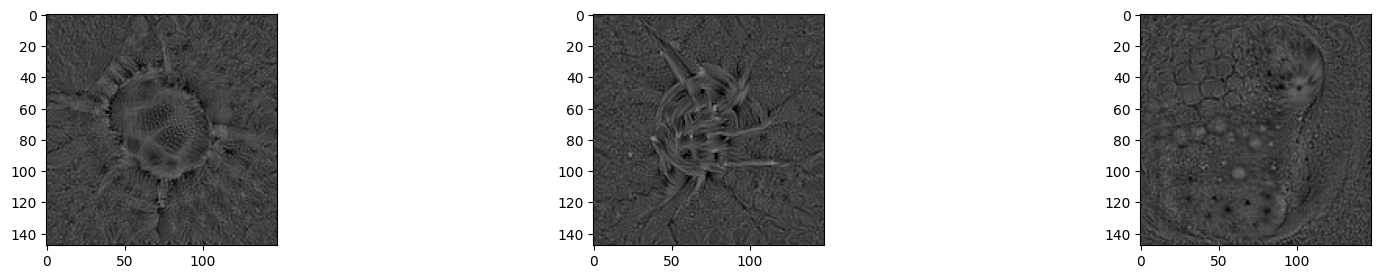

 60%|██████    | 300/500 [01:23<00:35,  5.57it/s, loss=tf.Tensor(-397.24176, shape=(), dtype=float32)]

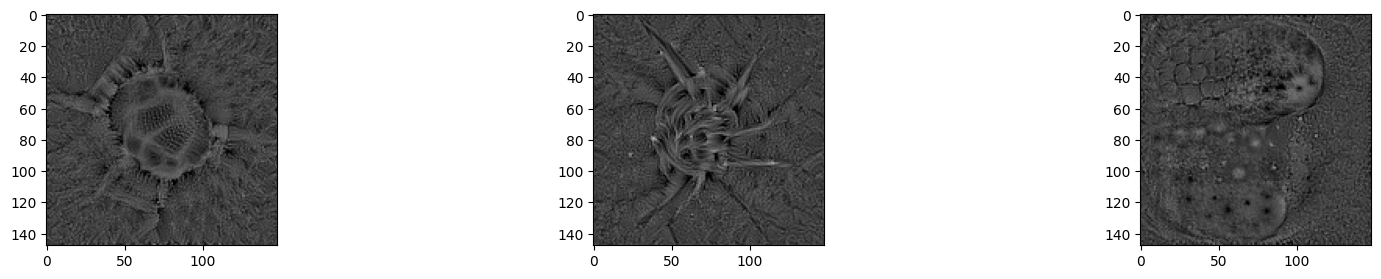

 80%|████████  | 400/500 [01:43<00:22,  4.52it/s, loss=tf.Tensor(-398.0092, shape=(), dtype=float32)]

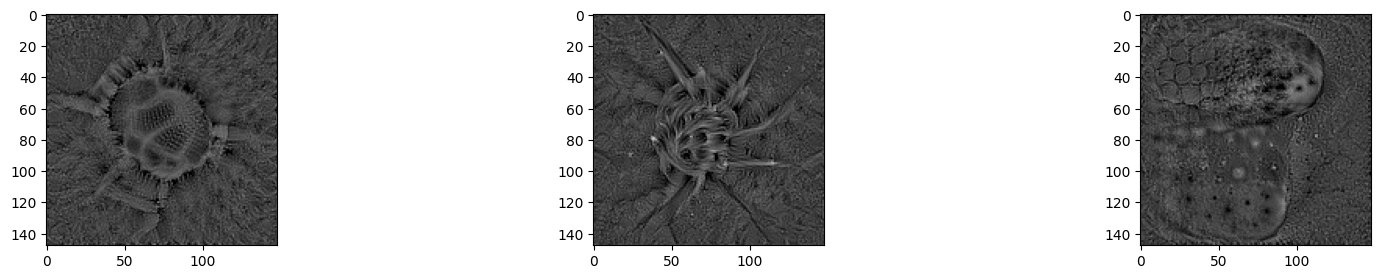

100%|█████████▉| 499/500 [02:03<00:00,  5.62it/s, loss=tf.Tensor(-398.11682, shape=(), dtype=float32)]

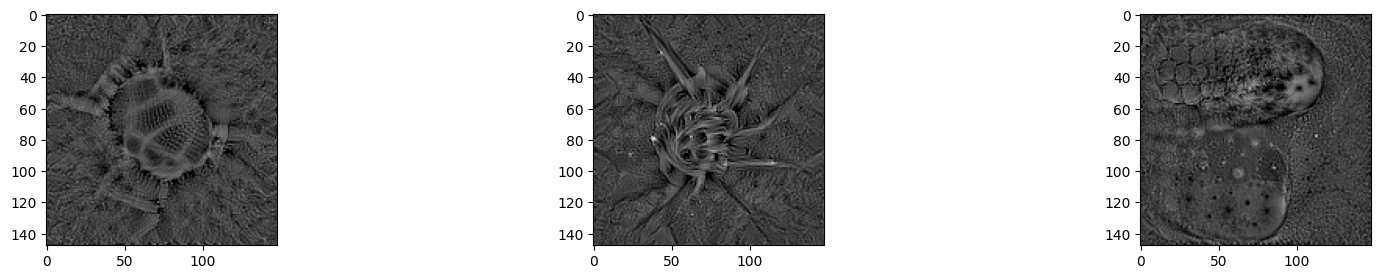

100%|██████████| 500/500 [02:03<00:00,  4.03it/s, loss=tf.Tensor(-398.11682, shape=(), dtype=float32)]


In [15]:
noise_start = np.random.normal(255/4, scale=1e0, size=X_test[3:4].shape)
optimize_input_for_logits(
    lambda x: pretrained_no_softmax(default_transform(x)), 
    loss_fn=get_logit_loss(range(number_of_class)), 
    input=noise_start,
    num_replicas=number_of_class, 
    learning_rate=1e0, 
    steps=500, 
    plot_interval=100)

  0%|          | 0/500 [00:00<?, ?it/s, loss=tf.Tensor(-40.122337, shape=(), dtype=float32)]

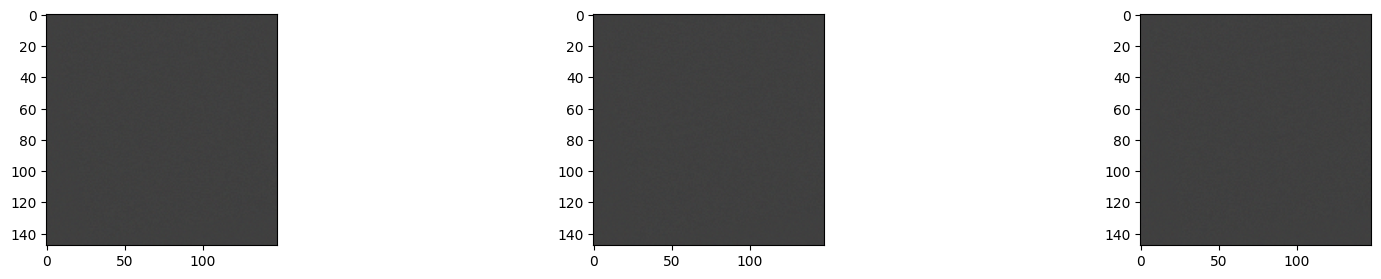

 20%|█▉        | 99/500 [00:11<00:38, 10.33it/s, loss=tf.Tensor(-45.47315, shape=(), dtype=float32)] 

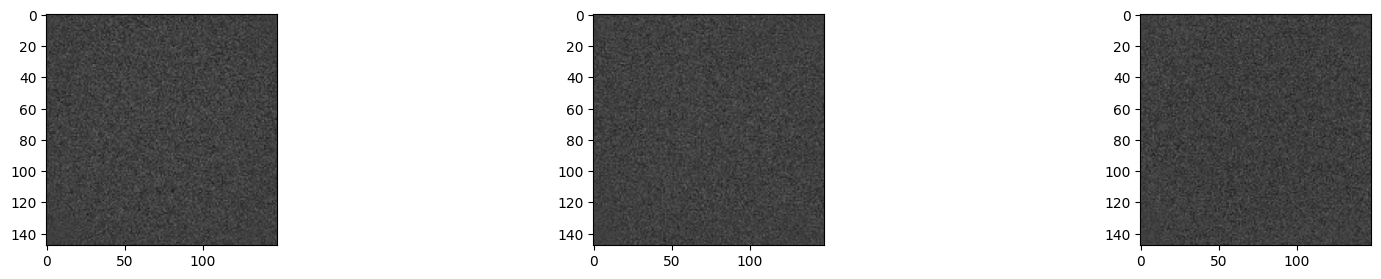

 40%|████      | 200/500 [00:22<00:32,  9.20it/s, loss=tf.Tensor(-60.69676, shape=(), dtype=float32)] 

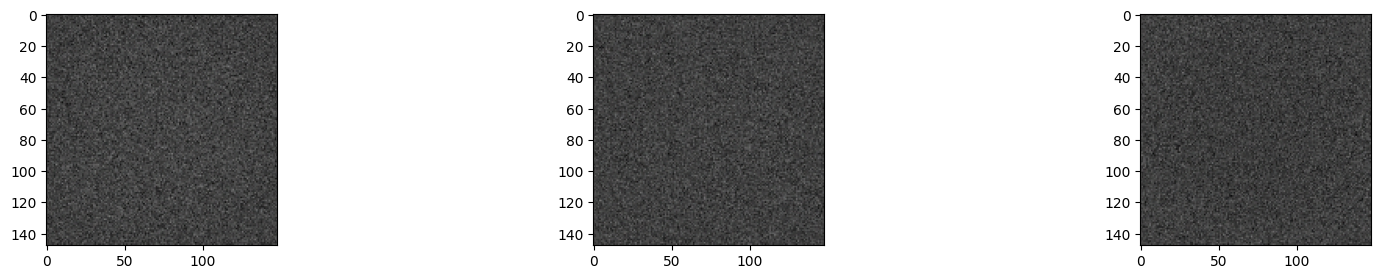

 60%|██████    | 300/500 [00:34<00:28,  6.90it/s, loss=tf.Tensor(-68.70833, shape=(), dtype=float32)]

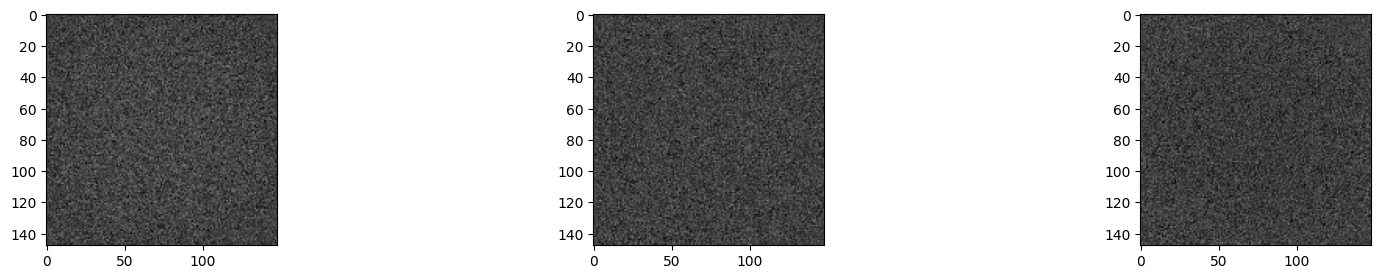

 80%|████████  | 400/500 [00:47<00:14,  7.10it/s, loss=tf.Tensor(-101.02742, shape=(), dtype=float32)]

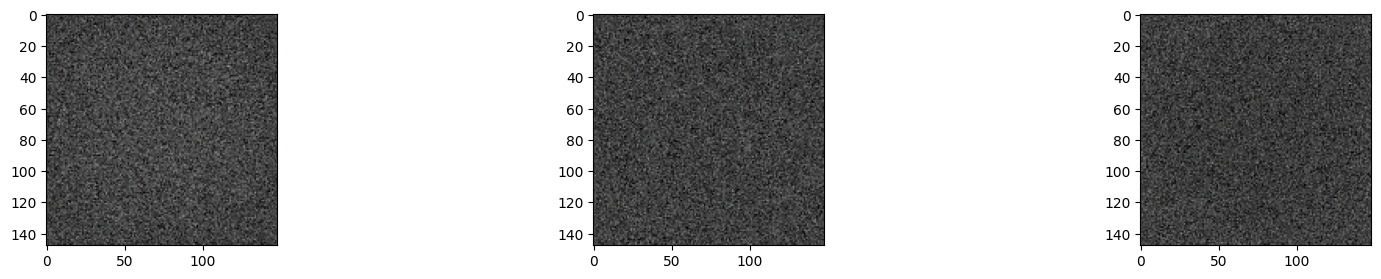

100%|█████████▉| 499/500 [00:59<00:00,  7.16it/s, loss=tf.Tensor(-96.881775, shape=(), dtype=float32)]

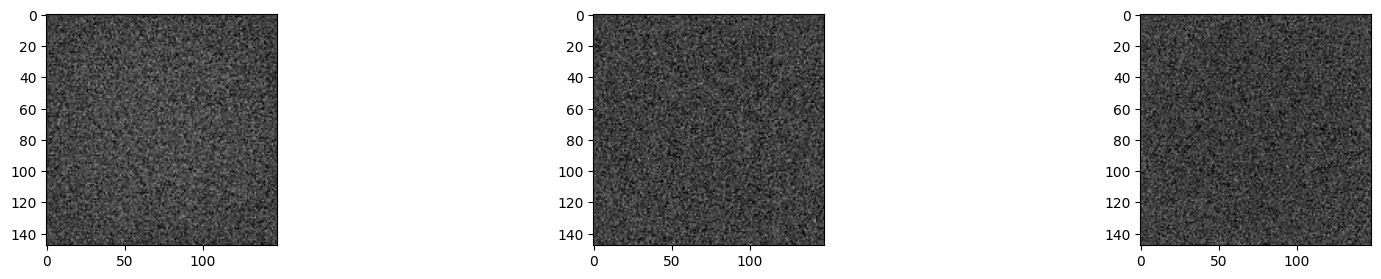

100%|██████████| 500/500 [00:59<00:00,  8.37it/s, loss=tf.Tensor(-96.881775, shape=(), dtype=float32)]


In [18]:
noise_start = np.random.normal(255/4, scale=1e0, size=X_test[3:4].shape)
optimize_input_for_logits(
    lambda x: scratch_no_softmax()(default_transform(x)), 
    loss_fn=get_logit_loss(range(number_of_class)), 
    input=noise_start, 
    num_replicas=number_of_class,
    learning_rate=1e0, 
    steps=500, 
    plot_interval=100
)

  0%|          | 0/500 [00:00<?, ?it/s, loss=tf.Tensor(-80.25844, shape=(), dtype=float32)]

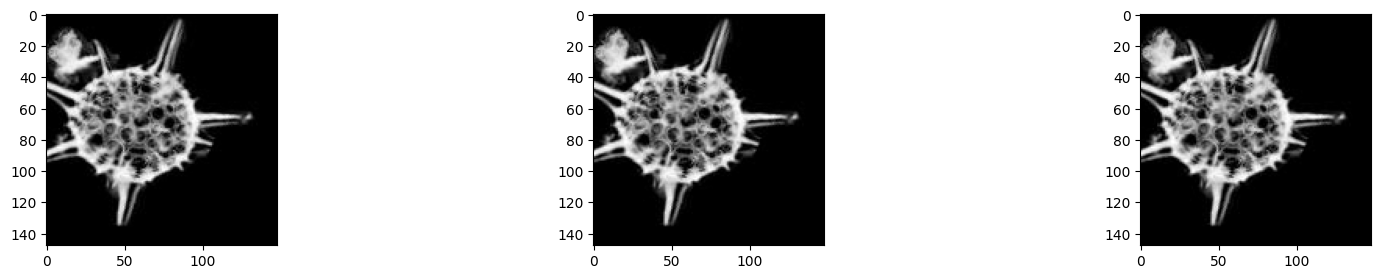

 20%|██        | 100/500 [00:11<00:39, 10.12it/s, loss=tf.Tensor(-105.51402, shape=(), dtype=float32)]

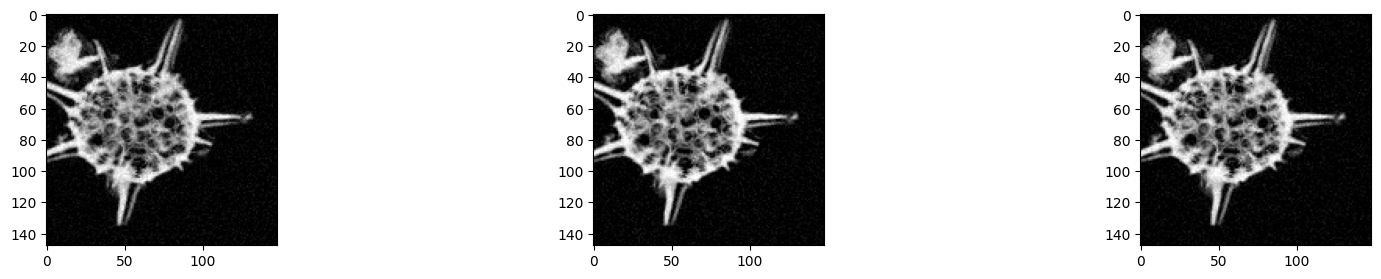

 40%|████      | 200/500 [00:23<00:34,  8.58it/s, loss=tf.Tensor(-160.03497, shape=(), dtype=float32)]

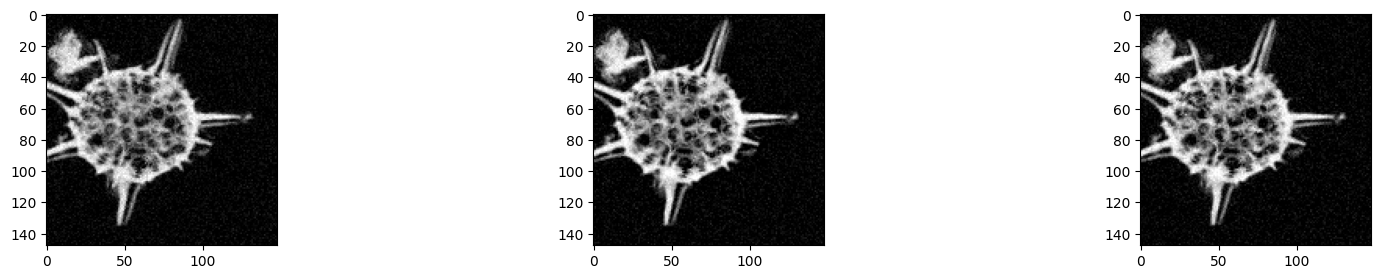

 60%|██████    | 300/500 [00:34<00:25,  7.92it/s, loss=tf.Tensor(-138.35316, shape=(), dtype=float32)]

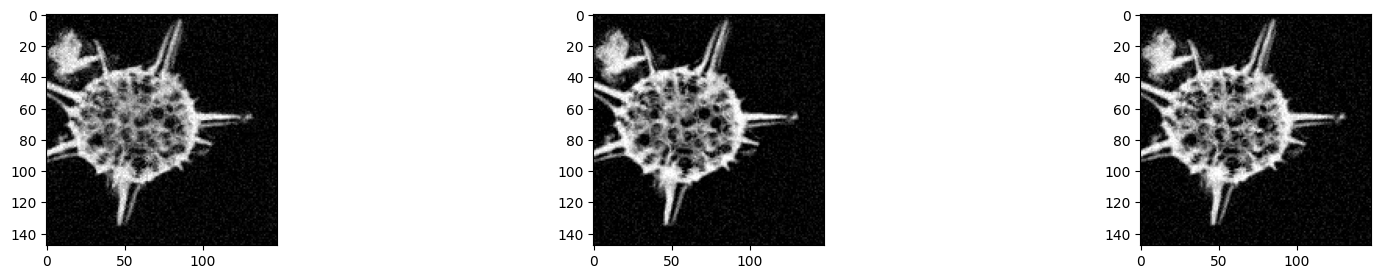

 80%|████████  | 400/500 [00:46<00:13,  7.53it/s, loss=tf.Tensor(-165.9004, shape=(), dtype=float32)] 

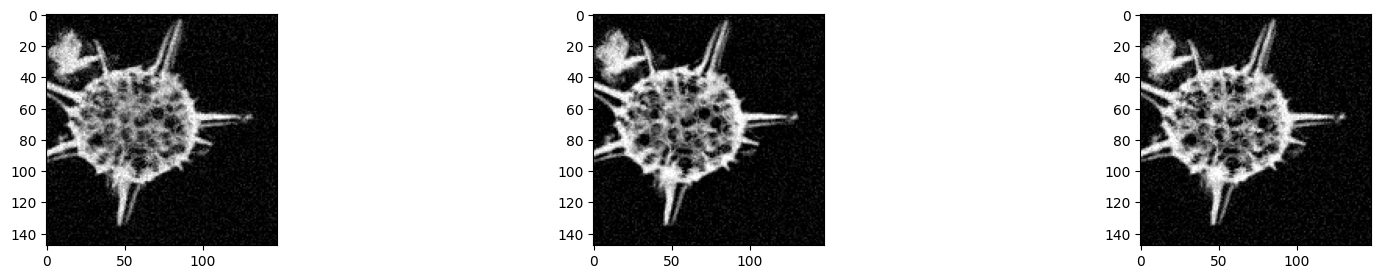

100%|█████████▉| 499/500 [00:57<00:00,  8.70it/s, loss=tf.Tensor(-157.18178, shape=(), dtype=float32)]

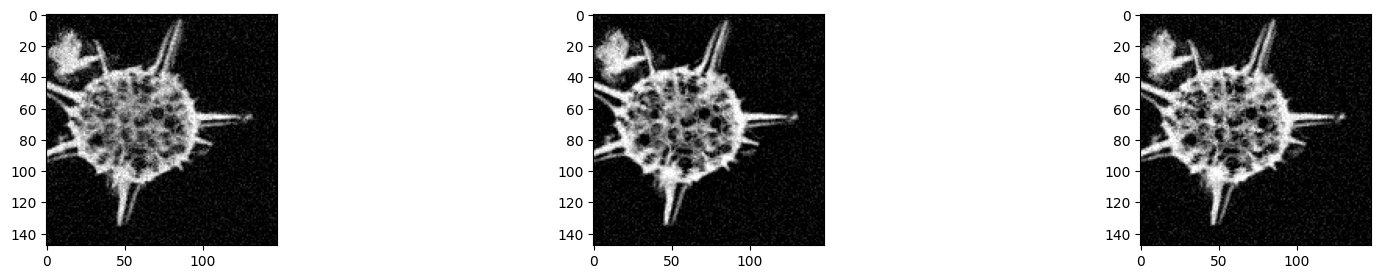

100%|██████████| 500/500 [00:58<00:00,  8.58it/s, loss=tf.Tensor(-157.18178, shape=(), dtype=float32)]


In [19]:
optimize_input_for_logits(
    lambda x: scratch_no_softmax()(default_transform(x)), 
    loss_fn=get_logit_loss(range(number_of_class)), 
    input=dataset_example, 
    num_replicas=number_of_class,
    learning_rate=1e0, 
    steps=500, 
    plot_interval=100
)